In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset
[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [3]:
plasma = pd.read_csv('plasma\metabolic tests\plasma(Specific Metabolics).csv')
serum = pd.read_csv('serum\metabolic tests\serum(Specific Metabolics).csv')
plasma.head()
plasma = plasma.drop('Unnamed: 0', axis=1)
serum = serum.drop('Unnamed: 0', axis=1)

Keep labels as an numpy array.

In [4]:
labels = np.reshape(plasma.Class.to_numpy(), (82,1))
targets = plasma.iloc[:, -1].unique()

# PCA, tSNE & Other Functions
## PCA

In [5]:
from sklearn.decomposition import PCA
def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)

    return pca_concatenate

In [6]:
def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [7]:
def plotting(pca_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("Principal Component Analysis",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'PC{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'PC{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = pca_df.Class == target
                axes[i, j-1].scatter(pca_df.loc[indicesToKeep, f'pc{i+1}']
                                , pca_df.loc[indicesToKeep, f'pc{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

## t-SNE

In [8]:
from sklearn.manifold import TSNE
def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)

    return tsne_concatenate

In [9]:
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [10]:
def tsne_plotting(tsne_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("t-SNE",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'TSNE{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'TSNE{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = tsne_df.Class == target
                axes[i, j-1].scatter(tsne_df.loc[indicesToKeep, f'tsne{i+1}']
                                , tsne_df.loc[indicesToKeep, f'tsne{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

# EDA
## Plasma

In [11]:
pca2_plasma = pca_analysis(plasma, 2)

pca2_plasma_df = make_dataframe(pca2_plasma, 2)
# print(pca2_plasma_df.head)

<Figure size 432x288 with 0 Axes>

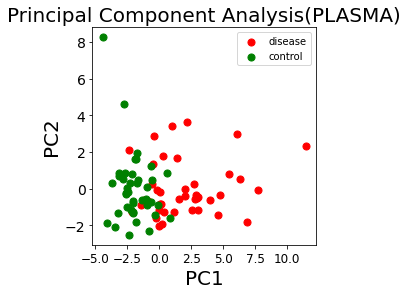

In [12]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis(PLASMA)",fontsize=20)
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_plasma_df.Class == target
    plt.scatter(pca2_plasma_df.loc[indicesToKeep, 'pc1']
               , pca2_plasma_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [13]:
pca3_plasma = pca_analysis(plasma, 3)

pca3_plasma_df = make_dataframe(pca3_plasma, 3)
# print(pca3_df.head)

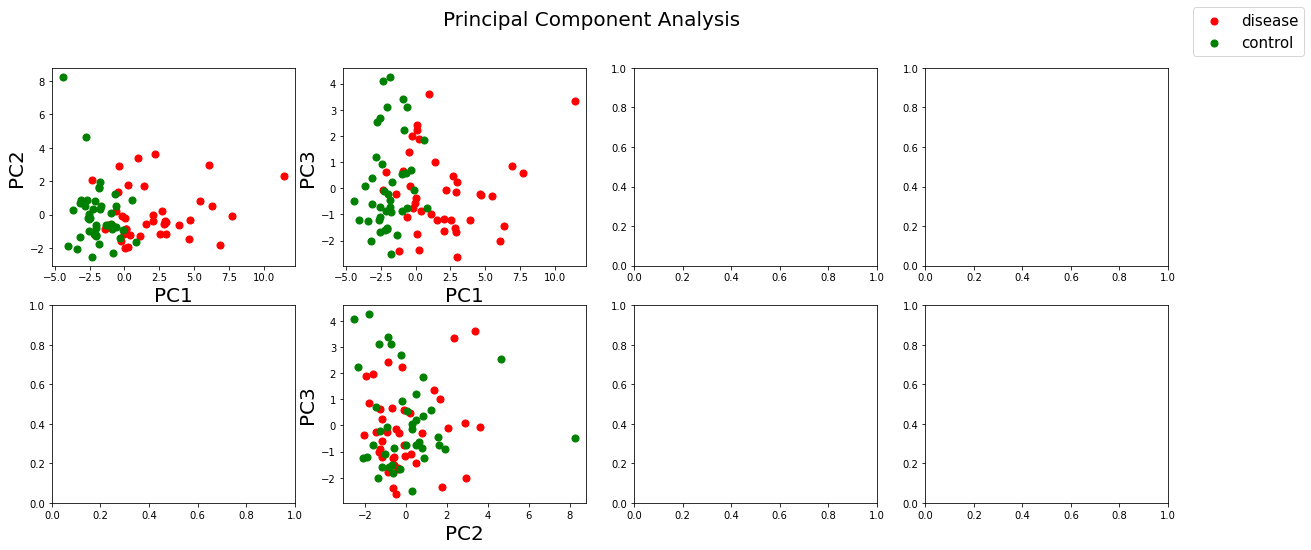

In [14]:
plotting(pca3_plasma_df, 3)

In [15]:
pca4_plasma = pca_analysis(plasma, 4)

pca4_plasma_df = make_dataframe(pca4_plasma, 4)
# print(pca4_plasma_df.head)

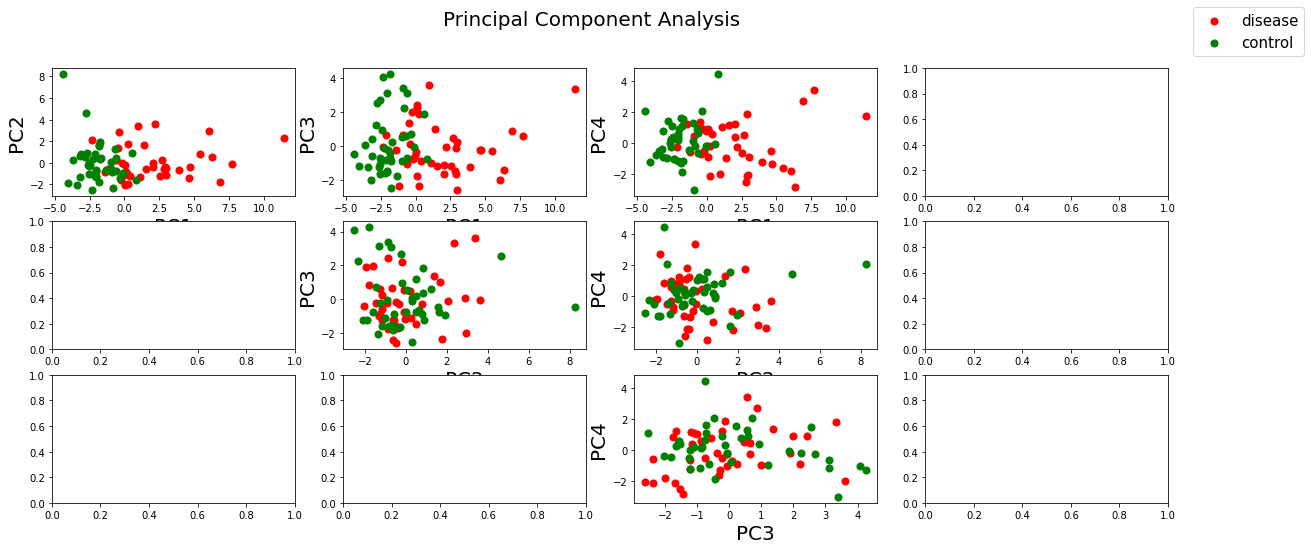

In [16]:
plotting(pca4_plasma_df, 4)

In [17]:
pca5_plasma = pca_analysis(plasma, 5)

pca5_plasma_df = make_dataframe(pca5_plasma, 5)
# print(pca5_df.head)

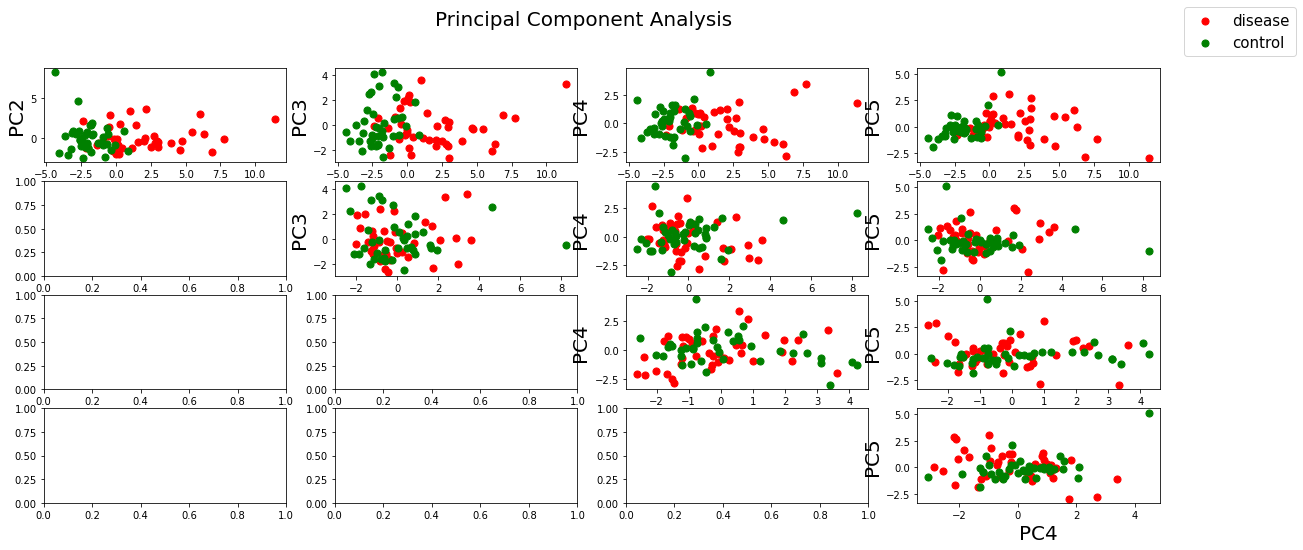

In [18]:
plotting(pca5_plasma_df, 5)

In [19]:
# now do PCA for 10, 15, 20
pca10_plasma = pca_analysis(plasma, 10)
pca10_plasma_df = make_dataframe(pca10_plasma, 10)

pca15_plasma = pca_analysis(plasma, 15)
pca15_plasma_df = make_dataframe(pca15_plasma, 15)

pca20_plasma = pca_analysis(plasma, 20)
pca20_plasma_df = make_dataframe(pca20_plasma, 20)
# print(pca20_plasma.head)

In [20]:
# pca15_plasma_df.to_csv("plasma/pca15_plasma_metabolics.csv")

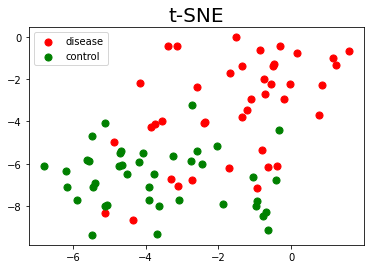

In [21]:
tsne2_plasma = tsne_analysis(plasma, 2)

tsne2_plasma_df = tsne_dataframe(tsne2_plasma, 2)
# print(tsne2_plasma_df.head)
# plotting(tsne2_plasma_df, 1, 1)
plt.title("t-SNE",fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_plasma_df.Class == target
    plt.scatter(tsne2_plasma_df.loc[indicesToKeep, 'tsne1']
               , tsne2_plasma_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)
plt.legend(targets,prop={'size': 10})

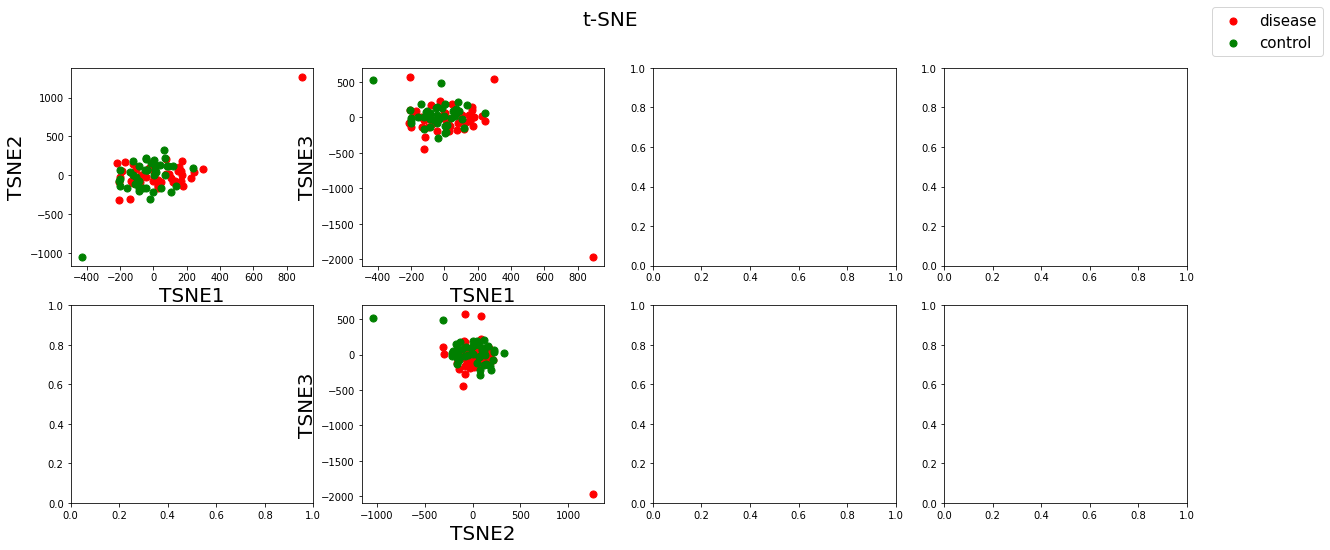

In [22]:
tsne3_plasma = tsne_analysis(plasma, 3)

tsne3_plasma_df = tsne_dataframe(tsne3_plasma, 3)
# print(tsne2_plasma_df.head)
tsne_plotting(tsne3_plasma_df, 3)


In [23]:
# tsne2_plasma_df.to_csv('plasma/tsne2_plasma_metabolics.csv')

## Serum

In [24]:
pca2_serum = pca_analysis(serum, 2)

pca2_serum_df = make_dataframe(pca2_serum, 2)
pca2_serum_df.head()

,pc1,pc2,Class
0,0.0546194,-1.48065,disease
1,1.05728,-1.52758,disease
2,0.826877,-1.97051,disease
3,0.411985,-1.74226,disease
4,-2.01118,2.21965,disease


<Figure size 432x288 with 0 Axes>

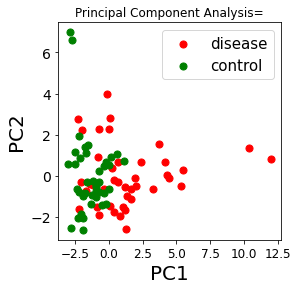

In [25]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis=",fontsize=12)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_serum_df.Class == target
    plt.scatter(pca2_serum_df.loc[indicesToKeep, 'pc1']
               , pca2_serum_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [26]:
pca3_serum = pca_analysis(serum, 3)

pca3_serum_df = make_dataframe(pca3_serum, 3)
# pca3_df.head()

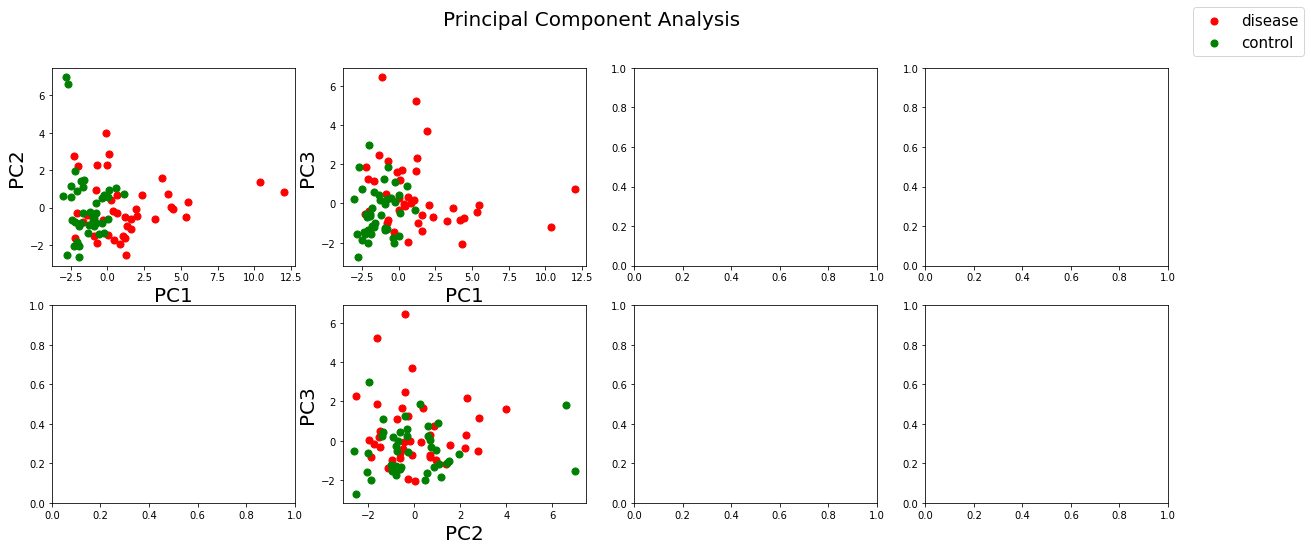

In [27]:
plotting(pca3_serum_df, 3)

In [28]:
pca4_serum = pca_analysis(serum, 4)

pca4_serum_df = make_dataframe(pca4_serum, 4)
# pca4_serum_df.head()

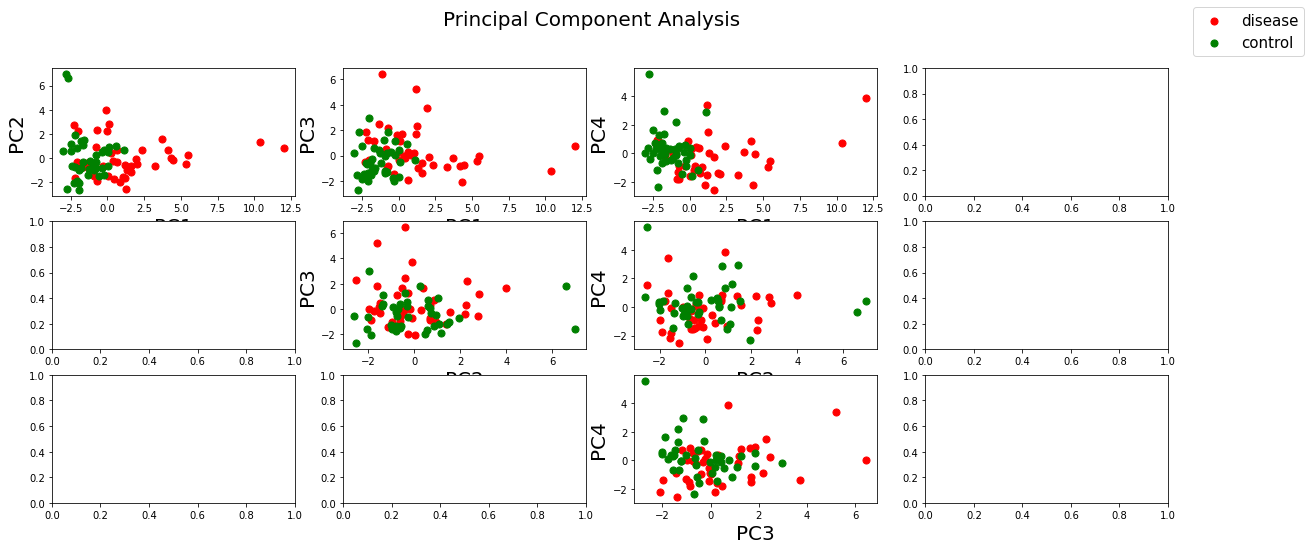

In [29]:
plotting(pca4_serum_df, 4)

In [30]:
pca5_serum = pca_analysis(serum, 5)

pca5_serum_df = make_dataframe(pca5_serum, 5)
# pca5_serum_df.head()

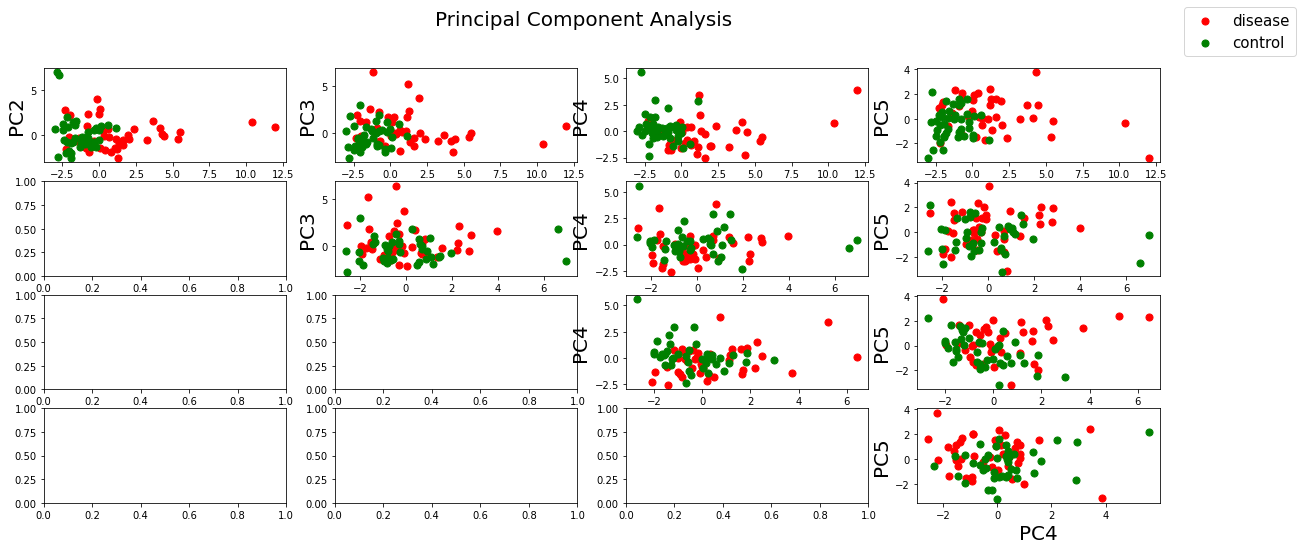

In [31]:
plotting(pca5_serum_df, 5)

In [32]:
# now do PCA for 10, 15, 20
pca10_serum = pca_analysis(serum, 10)
pca10_serum_df = make_dataframe(pca10_serum, 10)

pca15_serum = pca_analysis(serum, 15)
pca15_serum_df = make_dataframe(pca15_serum, 15)

pca20_serum = pca_analysis(serum, 20)
pca20_serum_df = make_dataframe(pca20_serum, 20)
# pca20_serum.head()

In [33]:
# pca15_serum_df.to_csv("serum/pca15_serum_metabolics.csv")

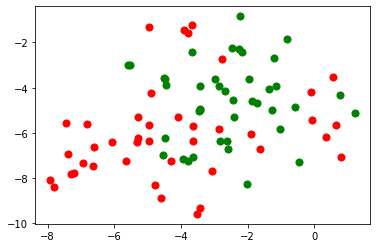

In [34]:
tsne2_serum = tsne_analysis(serum, 2)

tsne2_serum_df = tsne_dataframe(tsne2_serum, 2)
# print(tsne2_serum_df.head)
# plotting(tsne2_serum_df, 1, 1)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_serum_df.Class == target
    plt.scatter(tsne2_serum_df.loc[indicesToKeep, 'tsne1']
               , tsne2_serum_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)

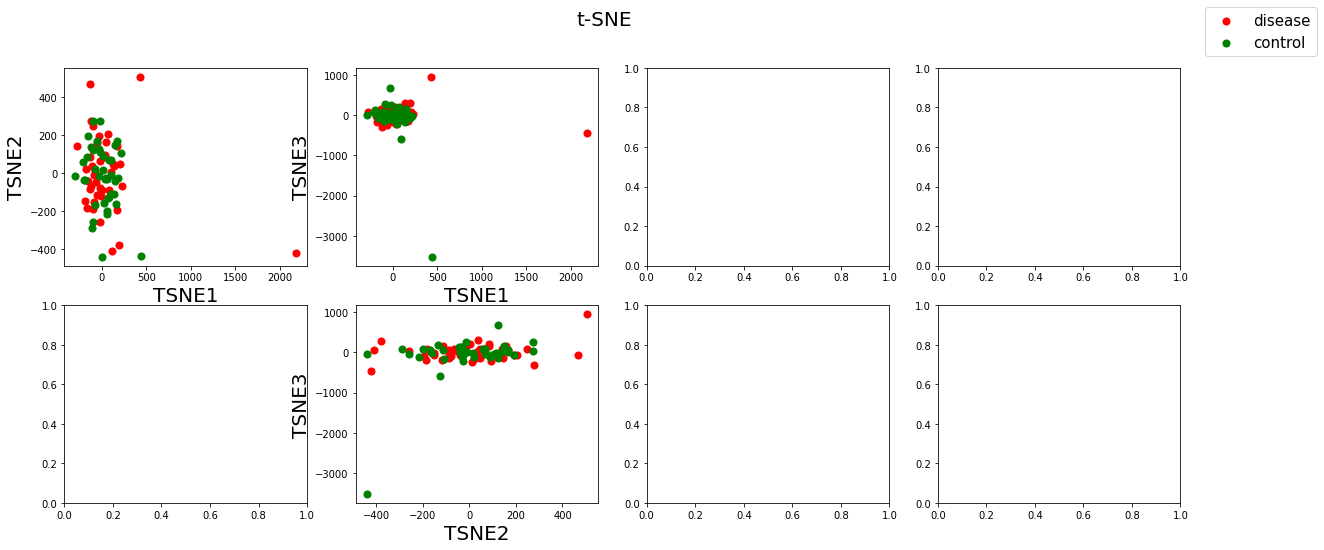

In [35]:
tsne3_serum = tsne_analysis(serum, 3)

tsne3_serum_df = tsne_dataframe(tsne3_serum, 3)
# print(tsne3_serum_df.head)
tsne_plotting(tsne3_serum_df, 3)


In [36]:
# tsne2_serum_df.to_csv('plasma/tsne2_serum_metabolics.csv')

# Models

In [37]:
# !pip install lazypredict

In [38]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold

C:\Users\UTSHAB\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [41]:
pca15_serum_df.dtypes

pc1      object
pc2      object
pc3      object
pc4      object
pc5      object
pc6      object
pc7      object
pc8      object
pc9      object
pc10     object
pc11     object
pc12     object
pc13     object
pc14     object
pc15     object
Class    object
dtype: object

In [42]:
# # make the independent variables float type
# pca2_plasma_df['Class'].map({"control": 0, "disease": 1})
# plasma = pca2_plasma_df.apply(pd.to_numeric)
# plasma

In [ ]:
accuracy = []
for k in [0, 2, 3, 4, 5, 10, 15, 20, 22, 23]:
    if k==0:
        name = ['Plasma(Specific Metabolics)', 'Serum(Specific Metabolics)']
        dfs = [plasma, serum]
    elif k==22 or k==23:
        name = [f'tsne{k-20}_plasma(Specific Metabolics)', f'tsne{k-20}_serum(Specific Metabolics)']
        dfs = [vars()[f'tsne{k-20}_plasma_df'], vars()[f'tsne{k-20}_serum_df']]
    else:
        name = [f'pca{k}_plasma(Specific Metabolics)', f'pca{k}_serum(Specific Metabolics)']
        dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      X, y = get_xy(data)
      rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
      raw_x = X
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #     print(X_train, X_test, y_train, y_test)

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)
    #     print(result)

      acc = []
      for i in range(10):
    #     print(result[i].iloc[0]['Balanced Accuracy'])
        acc.append(result[i].iloc[0]['Balanced Accuracy'])

      print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
      accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

 97%|█████████▋| 28/29 [00:00<00:00, 34.69it/s]

In [ ]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])

In [61]:
# accuracy_df.to_csv('accuracy/accuracy_Specific Metabolics.csv')
accuracy_df

,Processed Dataset,Accuracy
0,Plasma(Specific Metabolics),0.8820318570318569
1,Serum(Specific Metabolics),0.9286761849261849
2,pca2_plasma(Specific Metabolics),0.8960372960372961
3,pca2_serum(Specific Metabolics),0.8873300310800311
4,pca3_plasma(Specific Metabolics),0.8938956876456878
5,pca3_serum(Specific Metabolics),0.8795600233100233
6,pca4_plasma(Specific Metabolics),0.8977466977466978
7,pca4_serum(Specific Metabolics),0.8761509324009324
8,pca5_plasma(Specific Metabolics),0.9033022533022533
9,pca5_serum(Specific Metabolics),0.8973679098679099


In [62]:
name = ['plasma']
dfs = [plasma]

random_state = 42

for idx, data in enumerate(dfs):
  result = []
  X, y = get_xy(data)
  rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
  raw_x = X
  for train_index, test_index in rs.split(X):
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(X_train, X_test, y_train, y_test)

    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    result.append(models)
#     print(result)

  acc = []
  for i in range(10):
#     print(result[i].iloc[0]['Balanced Accuracy'])
    acc.append(result[i].iloc[0]['Balanced Accuracy'])

100%|██████████| 29/29 [00:00<00:00, 48.41it/s]


In [63]:
result

[                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 RidgeClassifierCV                  0.88               0.91     0.91      0.88   
 SVC                                0.88               0.91     0.91      0.88   
 NuSVC                              0.88               0.91     0.91      0.88   
 LogisticRegression                 0.88               0.91     0.91      0.88   
 RandomForestClassifier             0.88               0.87     0.87      0.88   
 BaggingClassifier                  0.88               0.87     0.87      0.88   
 LinearDiscriminantAnalysis         0.88               0.87     0.87      0.88   
 CalibratedClassifierCV             0.82               0.86     0.86      0.83   
 BernoulliNB                        0.82               0.83     0.83      0.83   
 RidgeClassifier                    0.82               0.83     0.83      0.83   
 LGBMClassifier 